# FINANCIAL ECONOMETRICS - NLP and S&P500### Twitter sentiment index, index market returns and Granger causality
Eldar Afaunov and Cynthia El Hayek

Downloading Tweets

In [1]:
import GetOldTweets3 as got
import pandas as pd
import csv
from datetime import date, timedelta
import numpy as np

In [3]:
# downlaoding Tweets for DonaldTrump since 01 01 2015 till 01 01 2019
tweetCriteria = got.manager.TweetCriteria().setUsername("realDonaldTrump")\
                                           .setSince("2015-01-01")\
                                           .setUntil("2019-01-01")
tweets = got.manager.TweetManager.getTweets(tweetCriteria)


In [4]:
tweets.head()

Unnamed: 0                          0  \
0           0  2019-05-28 21:58:55+00:00   
1           1  2015-01-01 00:00:26+00:00   
2           2  2015-01-01 00:02:37+00:00   
3           3  2015-01-01 00:06:40+00:00   
4           4  2015-01-01 00:09:01+00:00   

                                                   1  
0  I was actually sticking up for Sleepy Joe Bide...  
1  " @JaayZen: @realDonaldTrump Thanks Donald. No...  
2  " @teamconquerca: First time in the"Trump Inte...  
3  " @AngelaTN777: @gochico @realDonaldTrump: He ...  
4  " @JaayZen: @grandmiapens He has all the ingre...

In [5]:
del tweets['Unnamed: 0']
tweets.columns = ['date', 'tweet']

Cleaning Tweets and Getting Sentiments

In [6]:
# preprocessing tweets: removing URLs, emojis, mentions and some punctuation
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION)
import re
def cleaner(tweets):
    x = []
    for i in range(len(tweets)):
        temp = p.clean(tweets[i])
        #temp = re.sub('[#]', '', temp)
        temp = re.sub('[#":,$]', '', temp)


        x.append(temp)
    return x
tweets['cleaned_tweet']=cleaner(tweets['tweet'])

In [7]:
tweets.head()

date  \
0  2019-05-28 21:58:55+00:00   
1  2015-01-01 00:00:26+00:00   
2  2015-01-01 00:02:37+00:00   
3  2015-01-01 00:06:40+00:00   
4  2015-01-01 00:09:01+00:00   

                                               tweet  \
0  I was actually sticking up for Sleepy Joe Bide...   
1  " @JaayZen: @realDonaldTrump Thanks Donald. No...   
2  " @teamconquerca: First time in the"Trump Inte...   
3  " @AngelaTN777: @gochico @realDonaldTrump: He ...   
4  " @JaayZen: @grandmiapens He has all the ingre...   

                                       cleaned_tweet  
0  I was actually sticking up for Sleepy Joe Bide...  
1    Thanks Donald. Now run for president! Fulfil...  
2    First time in theTrump International Hotel a...  
3     He STANDS UP for what he believes in!! rega...  
4    He has all the ingredients to get elected an...

In [8]:
# adding word count column
x = []
for i in range(len(tweets['cleaned_tweet'])):
    x.append(len(tweets['cleaned_tweet'][i].split()))
tweets['word_count']=x

In [9]:
tweets.head()

date  \
0  2019-05-28 21:58:55+00:00   
1  2015-01-01 00:00:26+00:00   
2  2015-01-01 00:02:37+00:00   
3  2015-01-01 00:06:40+00:00   
4  2015-01-01 00:09:01+00:00   

                                               tweet  \
0  I was actually sticking up for Sleepy Joe Bide...   
1  " @JaayZen: @realDonaldTrump Thanks Donald. No...   
2  " @teamconquerca: First time in the"Trump Inte...   
3  " @AngelaTN777: @gochico @realDonaldTrump: He ...   
4  " @JaayZen: @grandmiapens He has all the ingre...   

                                       cleaned_tweet  word_count  
0  I was actually sticking up for Sleepy Joe Bide...          48  
1    Thanks Donald. Now run for president! Fulfil...          16  
2    First time in theTrump International Hotel a...          16  
3     He STANDS UP for what he believes in!! rega...          15  
4    He has all the ingredients to get elected an...          21

In [10]:
# keeping tweets of length 3 or more words as we belive tweets with less words don't bring any information or sentiment
tweets_sub=tweets[tweets['word_count']>=3]
tweets_sub.head()

date  \
0  2019-05-28 21:58:55+00:00   
1  2015-01-01 00:00:26+00:00   
2  2015-01-01 00:02:37+00:00   
3  2015-01-01 00:06:40+00:00   
4  2015-01-01 00:09:01+00:00   

                                               tweet  \
0  I was actually sticking up for Sleepy Joe Bide...   
1  " @JaayZen: @realDonaldTrump Thanks Donald. No...   
2  " @teamconquerca: First time in the"Trump Inte...   
3  " @AngelaTN777: @gochico @realDonaldTrump: He ...   
4  " @JaayZen: @grandmiapens He has all the ingre...   

                                       cleaned_tweet  word_count  
0  I was actually sticking up for Sleepy Joe Bide...          48  
1    Thanks Donald. Now run for president! Fulfil...          16  
2    First time in theTrump International Hotel a...          16  
3     He STANDS UP for what he believes in!! rega...          15  
4    He has all the ingredients to get elected an...          21

In [11]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber

In [12]:
# getting tweets sentiments (probability of being positive) and adding it as a column "sentiment_score"
tb = Blobber(analyzer=NaiveBayesAnalyzer())
sentiment = [tb(tweet).sentiment[1] for tweet in tweets_sub['cleaned_tweet']]
tweets_sub['sentiment_score'] = sentiment
tweets_sub.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


date  \
0  2019-05-28 21:58:55+00:00   
1  2015-01-01 00:00:26+00:00   
2  2015-01-01 00:02:37+00:00   
3  2015-01-01 00:06:40+00:00   
4  2015-01-01 00:09:01+00:00   

                                               tweet  \
0  I was actually sticking up for Sleepy Joe Bide...   
1  " @JaayZen: @realDonaldTrump Thanks Donald. No...   
2  " @teamconquerca: First time in the"Trump Inte...   
3  " @AngelaTN777: @gochico @realDonaldTrump: He ...   
4  " @JaayZen: @grandmiapens He has all the ingre...   

                                       cleaned_tweet  word_count  \
0  I was actually sticking up for Sleepy Joe Bide...          48   
1    Thanks Donald. Now run for president! Fulfil...          16   
2    First time in theTrump International Hotel a...          16   
3     He STANDS UP for what he believes in!! rega...          15   
4    He has all the ingredients to get elected an...          21   

   sentiment_score  
0         0.673942  
1         0.763977  
2         0.892935  
3         0.733364  
4         0.709207

QUESTION 3: Properties of Sentiment Series

In [13]:
# decsriptive stats of sentiment_score
tweets_sub['sentiment_score'].describe()

count    17839.000000
mean         0.673312
std          0.266211
min          0.001496
25%          0.487442
50%          0.728300
75%          0.911446
max          1.000000
Name: sentiment_score, dtype: float64

In [14]:
# taking the date and sentiment_Score only part of the data
temp = []
for i in tweets_sub["date"].index:
    temp.append(str(pd.to_datetime(tweets_sub["date"][i]).date()))
tweets_sub["date"]=temp
tweets_series = tweets_sub.drop(columns=['tweet', 'cleaned_tweet','word_count'])
tweets_series.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


date  sentiment_score
0  2019-05-28         0.673942
1  2015-01-01         0.763977
2  2015-01-01         0.892935
3  2015-01-01         0.733364
4  2015-01-01         0.709207

In [15]:
# transforming the sentiment_Score series into daily series by getting the mean sentiment score per day
tweets_series_daily = tweets_series.groupby("date").mean()
tweets_series_daily.head()

sentiment_score
date                       
2015-01-01         0.689167
2015-01-02         0.643415
2015-01-03         0.679830
2015-01-04         0.589839
2015-01-05         0.627289

In [16]:
# descriptive statistics of daily sentiment_score
tweets_series_daily.describe()

sentiment_score
count      1583.000000
mean          0.702734
std           0.128877
min           0.030911
25%           0.618114
50%           0.699602
75%           0.794331
max           0.999953

In [17]:
# mean and kurtosis of daily sentiment_score
from scipy.stats import kurtosis, skew
print(kurtosis(tweets_series_daily['sentiment_score']),skew(tweets_series_daily['sentiment_score']))

0.5693100633321735 -0.26367107889368296


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import math
import numpy as np
from scipy import stats
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller

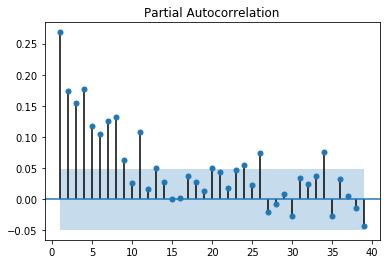

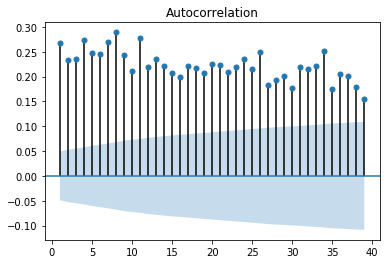

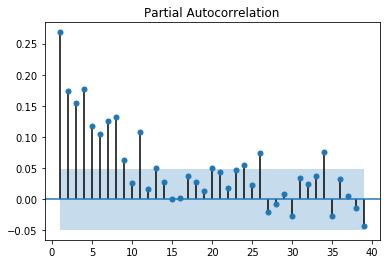

In [19]:
# ACF and PACF
plot_acf(tweets_series_daily["sentiment_score"],lags=range(1,40))
plot_pacf(tweets_series_daily["sentiment_score"],lags=range(1,40))

 ACF shows that the series is non stationary and differencing is needed

In [20]:
# differencing the series
tweets_series_daily_diff= np.diff(tweets_series_daily["sentiment_score"])# first order diffrence

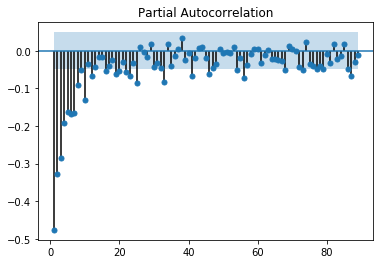

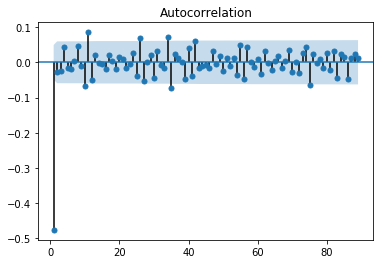

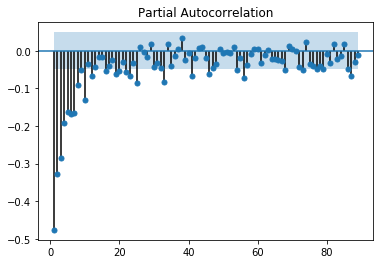

In [23]:
# ACF and PACF after differencing
plot_acf(tweets_series_daily_diff,lags=range(1,90), alpha=0.05)
plot_pacf(tweets_series_daily_diff,lags=range(1,90), alpha=0.05)

The ACF and PACF show that it is a moving average process (after differncing): PACF exponentially decreasing, whil.e ACF has one significant lag
    The series can be estimated by an ARIMA(0,1,1) model in this case

In [21]:
# Estimating ARIMA Model on 90% of the data
from statsmodels.tsa.arima_model import ARIMA
values = tweets_series_daily.values
size = int(len(values) * 0.9)
train, test = values[0:size], values[size:len(values)]


model = ARIMA(train, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1423
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1076.400
Method:                       css-mle   S.D. of innovations              0.113
Date:                Fri, 31 May 2019   AIC                          -2146.799
Time:                        09:52:32   BIC                          -2131.018
Sample:                             1   HQIC                         -2140.905
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.939      0.348      -0.000       0.000
ma.L1.D.y     -0.9555      0.012    -81.820      0.000      -0.978      -0.933
                                    Roots           

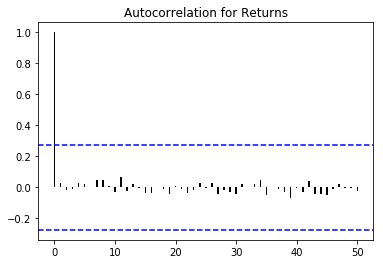

In [22]:
# plotting the residuals of the model
res = model_fit.resid
ACF = acf(res, nlags=50)
x = range(0,51)
plt.bar(x,ACF,1/4, color="black")
plt.axhline(y=-1.96/np.sqrt(len(ACF)),linestyle='--',color='b')
plt.axhline(y=1.96/np.sqrt(len(ACF)),linestyle='--',color='b')
plt.title('Autocorrelation for Returns')
plt.show()

residuals plot show that the estimated model is good

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


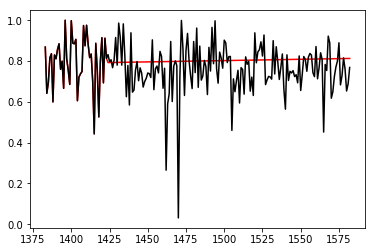

In [23]:
# forecasting using the estimated model (the remaining 10% of the data points)
forecast = model_fit.forecast(steps=len(test))[0]
frcst = pd.DataFrame(np.append(train, forecast))
y = pd.DataFrame(np.append(train,test))

plt.plot(frcst.tail(200),color='red')
plt.plot(y.tail(200),color='black')
plt.show()

S&P 500 Series

In [141]:
# downloading s&p 500 date
start_date = '2015-01-01'
end = "2019-05-28"
from pandas_datareader import data
SP500 = data.DataReader('^GSPC', 'yahoo', start_date, end)
SP500['Log']=np.log(SP500['Adj Close'])
Returns=np.diff(SP500['Log'])*100
#We assume the first return  to be 0
Returns=np.append(0,Returns)
SP500['Returns']=Returns
#some info on the downloaded dataset
print(SP500.shape)
SP500.head()
SP500_1 = SP500["Returns"]
#print(Apple)

(1107, 8)


In [24]:
# reading s&p 500 data from the saved file
sp = pd.read_csv("/Users/cynthiaelhayek/Documents/MS DSBA/Financial Econometrics/HW4/sp500.csv")
sp.head()

2015-01-02       0.0
0  2015-01-05 -1.844721
1  2015-01-06 -0.893325
2  2015-01-07  1.156274
3  2015-01-08  1.773017
4  2015-01-09 -0.843932

In [25]:
# merging the s&p 500 index and sentiment_score series into one dataframe
sp.columns = ['date','value']
sp = sp.set_index("date")
sp = sp.reset_index()
sp.columns = ['date','value']
ts = tweets_series_daily.reset_index()
df = pd.merge(sp,ts)
df.head()

date     value  sentiment_score
0  2015-01-05 -1.844721         0.627289
1  2015-01-06 -0.893325         0.639312
2  2015-01-07  1.156274         0.556526
3  2015-01-08  1.773017         0.538331
4  2015-01-09 -0.843932         0.578471

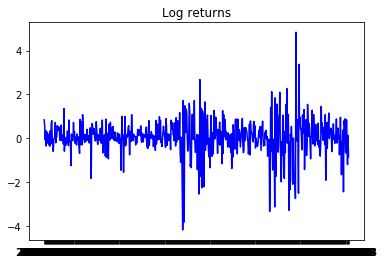

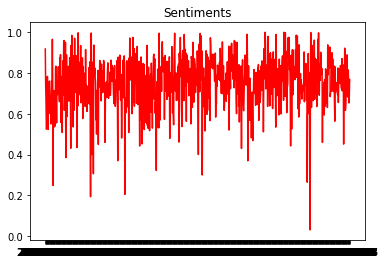

In [26]:
# plotting both series on different plots
sp = sp.set_index("date")
x = sp["2017-01-01":]
y = tweets_series_daily["2017-01-01":]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, color="blue")
plt.title("Log returns")
fig, ax = plt.subplots()
ax.plot(y, color="red")
plt.title("Sentiments")
plt.show()

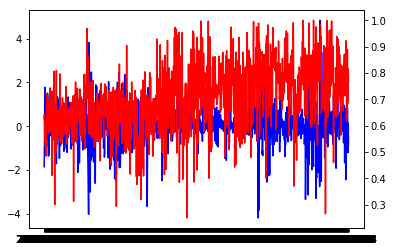

In [27]:
# plotting both series on same plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["date"], df["value"], color="blue")
ax2 = ax.twinx()
ax2.plot(df["date"],df["sentiment_score"], color="red")
plt.show()

As it can be seen, the flactuation is really high for both series, but it can be hardly seen any realtionship on this plot.

Granger Causality Test

In [28]:
# granger causality test between the two series
from statsmodels.tsa.stattools import grangercausalitytests as gtest
gtest(df[['value','sentiment_score']],maxlag=20)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3493  , p=0.0675  , df_denom=1093, df_num=1
ssr based chi2 test:   chi2=3.3585  , p=0.0669  , df=1
likelihood ratio test: chi2=3.3533  , p=0.0671  , df=1
parameter F test:         F=3.3493  , p=0.0675  , df_denom=1093, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6818  , p=0.1865  , df_denom=1090, df_num=2
ssr based chi2 test:   chi2=3.3789  , p=0.1846  , df=2
likelihood ratio test: chi2=3.3737  , p=0.1851  , df=2
parameter F test:         F=1.6818  , p=0.1865  , df_denom=1090, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4211  , p=0.2350  , df_denom=1087, df_num=3
ssr based chi2 test:   chi2=4.2907  , p=0.2317  , df=3
likelihood ratio test: chi2=4.2823  , p=0.2326  , df=3
parameter F test:         F=1.4211  , p=0.2350  , df_denom=1087, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0760  , p=0.

{1: ({'ssr_ftest': (3.349276906435251, 0.06750676241676241, 1093.0, 1),
   'ssr_chi2test': (3.358469798218696, 0.06686016824803118, 1),
   'lrtest': (3.353334611135324, 0.06706901946268376, 1),
   'params_ftest': (3.3492769064352994, 0.06750676241676241, 1093.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.681753245534303, 0.1865298860127985, 1090.0, 2),
   'ssr_chi2test': (3.378935419926719, 0.18461776804202099, 2),
   'lrtest': (3.373732784569711, 0.1850986426884868, 2),
   'params_ftest': (1.68175324553431, 0.1865298860127985, 1090.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4210664018095174, 0.23503466462061673, 1087.0, 3),
   'ssr_chi2test': (4.290653110155323, 0.23174106110215886, 3),
   'lrtest': (4.282261103671772, 0.23255395326413605, 3),
   'params_ftest': (1.4210664018095267, 0.23503466462060219, 1087.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

Only at the first lag we can see the casuality, but only if we set alpha to 0.1. Then, the probability of casuality decreases as lag moves from the first one.